In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df_test = pd.read_csv("techuklon-int20h/test.csv")
df_train = pd.read_csv("techuklon-int20h/train.csv")
submission_example = pd.read_csv("techuklon-int20h/Samle_Submission.csv")

# EDA

– Handle Missing value 

– Outlier Treatment    

– Normalizing and Scaling( Numerical Variables)   



In [3]:
print(f"Train shape {df_train.shape}") 
print(f"Test shape {df_test.shape}") 

Train shape (30860, 52)
Test shape (13228, 51)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30860 entries, 0 to 30859
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      30860 non-null  int64  
 1   Week    30860 non-null  int64  
 2   V1      30812 non-null  float64
 3   V2      30812 non-null  float64
 4   V3      23760 non-null  float64
 5   V4      23760 non-null  float64
 6   V5      23760 non-null  float64
 7   V6      23760 non-null  float64
 8   V7      23760 non-null  float64
 9   V8      23760 non-null  float64
 10  V9      23760 non-null  float64
 11  V10     23760 non-null  float64
 12  V11     23760 non-null  float64
 13  V12     23760 non-null  float64
 14  V13     23760 non-null  float64
 15  V14     23760 non-null  float64
 16  V15     23760 non-null  float64
 17  V16     23760 non-null  float64
 18  V17     23760 non-null  float64
 19  V18     23760 non-null  float64
 20  V19     23760 non-null  float64
 21  V20     23760 non-null  float64
 22

In [5]:
features = df_train.columns.drop(['Id','Week','target'])
features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27'],
      dtype='object')

<AxesSubplot:xlabel='target', ylabel='count'>

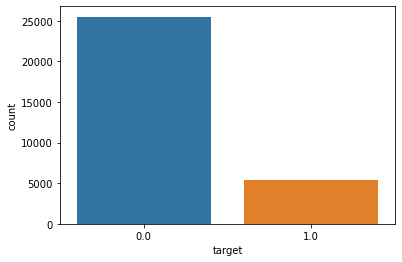

In [6]:
sns.countplot(x=df_train.target)

## Missing values

Filling nans and adding additional column which represents a number of nans in specific row.

In [7]:
df_train.isna().sum()/df_train.shape[0] * 100

Id         0.000000
Week       0.000000
V1         0.155541
V2         0.155541
V3        23.007129
V4        23.007129
V5        23.007129
V6        23.007129
V7        23.007129
V8        23.007129
V9        23.007129
V10       23.007129
V11       23.007129
V12       23.007129
V13       23.007129
V14       23.007129
V15       23.007129
V16       23.007129
V17       23.007129
V18       23.007129
V19       23.007129
V20       23.007129
V21       23.007129
V22       23.007129
P1         9.442644
P2         9.442644
P3         9.439404
P4         9.439404
P5         9.442644
P6         9.442644
P7         9.442644
P8         9.439404
P9         9.439404
P10        9.442644
P11        9.442644
P12        9.442644
P13        9.442644
P14        9.232016
P15        9.442644
P16        9.442644
P17        9.439404
P18        9.442644
P19        9.439404
P20        9.442644
P21        9.439404
P22        9.442644
P23        9.439404
P24        9.442644
P25        9.439404
P26        9.442644


In [8]:
df_train['nan_amount'] = df_train[features].apply(lambda row: row.isna().sum(),axis=1)
df_train["nan_amount"]

0         0
1         0
2         0
3         0
4         0
         ..
30855     0
30856    20
30857    20
30858    20
30859    47
Name: nan_amount, Length: 30860, dtype: int64

In [9]:
df_train.fillna(df_train.mean(),inplace=True)
df_test.fillna(df_train.mean(),inplace=True)

In [10]:
df_train.isna().sum()/df_train.shape[0] * 100

Id            0.0
Week          0.0
V1            0.0
V2            0.0
V3            0.0
V4            0.0
V5            0.0
V6            0.0
V7            0.0
V8            0.0
V9            0.0
V10           0.0
V11           0.0
V12           0.0
V13           0.0
V14           0.0
V15           0.0
V16           0.0
V17           0.0
V18           0.0
V19           0.0
V20           0.0
V21           0.0
V22           0.0
P1            0.0
P2            0.0
P3            0.0
P4            0.0
P5            0.0
P6            0.0
P7            0.0
P8            0.0
P9            0.0
P10           0.0
P11           0.0
P12           0.0
P13           0.0
P14           0.0
P15           0.0
P16           0.0
P17           0.0
P18           0.0
P19           0.0
P20           0.0
P21           0.0
P22           0.0
P23           0.0
P24           0.0
P25           0.0
P26           0.0
P27           0.0
target        0.0
nan_amount    0.0
dtype: float64

## Outlier Treatment

In [11]:
from sklearn.ensemble import IsolationForest

In [12]:
iso_clf = IsolationForest(random_state = 1).fit(df_train[features])
df_train.loc[:,'anomaly'] = iso_clf.predict(df_train[features])
df_train['anomaly'].value_counts()


 1    30237
-1      623
Name: anomaly, dtype: int64

In [13]:
df_train = df_train[df_train['anomaly'] == 1]
df_train = df_train.drop(columns=['anomaly'])
df_train.shape

(30237, 53)

## Normalizing and Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

cat = ['V2']
numerical = features.drop('V2') 

scaler = StandardScaler()
df_train.loc[:,numerical] = scaler.fit_transform(df_train[numerical])
df_test.loc[:,numerical] = scaler.transform(df_test[numerical])

In [15]:
features = list(features.values)
features

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27']

## Additional features

In [16]:
features_copy = features.copy()
for i,feature1 in enumerate(features_copy):
    for feature2 in features_copy[i:]:
        if feature1 != feature2:
            features = features + ([f'{feature1}*{feature2}',f'{feature1}-{feature2}',f'{feature1}+{feature2}'])
            df_train[f'{feature1}*{feature2}'] = df_train[feature1] * df_train[feature2] 
            df_train[f'{feature1}-{feature2}'] = df_train[feature1] - df_train[feature2] 
            df_train[f'{feature1}+{feature2}'] = df_train[feature1] + df_train[feature2]
                
                
            df_test[f'{feature1}*{feature2}'] = df_test[feature1] * df_test[feature2] 
            df_test[f'{feature1}-{feature2}'] = df_test[feature1] - df_test[feature2] 
            df_test[f'{feature1}+{feature2}'] = df_test[feature1] + df_test[feature2]
                
                
                
    

/tmp/ipykernel_26812/3666530020.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[f'{feature1}+{feature2}'] = df_train[feature1] + df_train[feature2]
/tmp/ipykernel_26812/3666530020.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[f'{feature1}+{feature2}'] = df_test[feature1] + df_test[feature2]
/tmp/ipykernel_26812/3666530020.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all column

In [17]:
df_train

,Id,Week,V1,V2,V3,V4,V5,V6,V7,V8,...,P24+P27,P25*P26,P25-P26,P25+P26,P25*P27,P25-P27,P25+P27,P26*P27,P26-P27,P26+P27
0,-6536978109522202983,0,-0.735192,0.0,-0.706645,-0.498565,-0.107935,0.533074,-1.171904,-1.143782,...,-2.179367,-0.710784,-1.898598,0.872660,0.006641,-0.500022,-0.525916,-0.017940,1.398576,1.372682
1,-6536978109522202983,1,-0.735192,0.0,-0.706645,-0.498565,-0.107935,0.533074,-1.171904,-1.143782,...,-1.934243,0.340351,-0.167245,1.178717,0.117420,0.273558,0.737913,0.156251,0.440804,0.905159
2,-6536978109522202983,2,-0.735192,0.0,-0.706645,-0.498565,-0.107935,0.533074,-1.171904,-1.143782,...,-2.820033,-0.007278,0.392082,-0.353010,-0.012769,0.673149,-0.634077,0.243501,0.281067,-1.026159
3,-6536978109522202983,3,-0.735192,0.0,-0.706645,-0.498565,-0.107935,0.533074,-1.171904,-1.143782,...,-2.013316,-0.055097,-0.519340,0.222093,-0.036664,-0.395315,0.098068,0.091452,0.124025,0.617407
4,-1744017237843019509,0,-0.295845,1.0,-0.486203,-0.400008,1.386144,-0.190234,0.225093,-0.088936,...,-1.004409,-0.410213,1.288368,-0.137982,-0.236562,0.986467,0.163919,0.293310,-0.301901,-1.124449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30855,2010738301694279951,3,0.216727,2.0,-0.611907,3.138584,-0.424475,-0.190234,0.324427,-1.215422,...,0.482999,-0.166101,1.040032,-0.645957,0.007735,0.157782,0.236293,-0.033092,-0.882250,-0.803739
30856,8802977523104348852,0,-0.458828,1.0,0.002374,0.000916,0.059483,0.002979,-0.007947,-0.006330,...,0.251140,-0.149555,-1.497626,-1.282445,0.594234,-0.962540,-1.817531,-0.045994,0.535086,-0.319905
30857,8802977523104348852,1,-0.458828,1.0,0.002374,0.000916,0.059483,0.002979,-0.007947,-0.006330,...,3.662435,-8.126573,-6.727969,3.572013,-4.427781,-4.383962,1.228005,14.450789,2.344007,7.955974
30858,8802977523104348852,2,-0.458828,1.0,0.002374,0.000916,0.059483,0.002979,-0.007947,-0.006330,...,1.548237,-0.438342,-1.341759,-0.216683,-0.539054,-1.471007,-0.087436,0.389156,-0.129248,1.254324


## Model

In [18]:
#%pip install lightgbm

In [19]:
from lightgbm import LGBMClassifier

In [ ]:
clf = LGBMClassifier()
X_train,y_train = df_train.loc[:int(df_train.shape[0]*0.8),features],df_train.loc[:int(df_train.shape[0]*0.8),'target']
X_test,y_test = df_train.loc[int(df_train.shape[0]*0.8):,features],df_train.loc[int(df_train.shape[0]*0.8):,'target']
clf.fit(X_train,y_train)

In [ ]:
prediction_test = clf.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,prediction_test)

# ToDO

Речі, які на мою думку є сенс зробити.


1) Мб варто подивитися на розподіли данних, але не знаю чи це щось дасть

2) Власне модель, бажано з підбором гіперпараметрів.